In [ ]:
%%writefile /content/drive/MyDrive/BINANCE/1H/Technical_indicators_1h.py


Overwriting /content/drive/MyDrive/BINANCE/1H/Technical_indicators_1h.py


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
!apt-get update
!apt-get install libta-lib-dev


In [ ]:
!pip install TA-Lib
!pip install ta
!pip install pyproject.toml
!pip install pandas scikit-learn tensorflow
!pip install matplotlib
!pip install tensorflow-gpu pandas sklearn
!pip install scikit-learn

In [ ]:
!pip list


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
# ОБОВЯЗКОВО АКТИВУВАТИ
# Specify the device for computation
with tf.device('/GPU:0'):
    # Your TensorFlow operations here
    a = tf.constant([1.0, 2.0, 3.0], shape=[3], name='a')
    b = tf.constant([1.0, 2.0, 3.0], shape=[3], name='b')
    c = tf.add(a, b)

# Check the device for the resultant tensor
print(c.device)
import tensorflow as tf

# Check TensorFlow version and GPU availability
print(f'TensorFlow version: {tf.__version__}')
print(f'GPU Available: {tf.config.list_physical_devices("GPU")}')



/job:localhost/replica:0/task:0/device:GPU:0
TensorFlow version: 2.14.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install gputil
import GPUtil

# Get the list of available GPU devices
gpus = GPUtil.getGPUs()

# Print detailed GPU information
for gpu in gpus:
    print(f"GPU ID: {gpu.id}")
    print(f"GPU Name: {gpu.name}")
    # print(f"GPU Driver Version: {gpu.driverVersion}")  # Remove or comment out this line
    print(f"GPU Memory Free: {gpu.memoryFree}MB")
    print(f"GPU Memory Used: {gpu.memoryUsed}MB")
    print(f"GPU Memory Total: {gpu.memoryTotal}MB")
    print("------")
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=8ab323b0cef4ca5d52f336b46a952ef398b5ab04d62237b82d8ae56b33d3be75
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
GPU ID: 0
GPU Name: Tesla T4
GPU Memory Free: 14740.0MB
GPU Memory Used: 361.0MB
GPU Memory Total: 15360.0MB
------
Num GPUs Available:  1


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct 25 15:49:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |    361MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)

!pip install keras

In [ ]:
# model exsemple 7/0  LSTM -WEIGHTS 7

import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Input, Bidirectional, LeakyReLU
from keras.regularizers import l2, l1, l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import initializers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime as dt
import pickle  # Import pickle
import time

start_time = time.time()

# Load and preprocess data
def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df.drop(['TRADE_TIME'], axis=1, inplace=True)
        return df
    except Exception as e:
        print(f"Error reading the file {file_path}. Exception: {e}")
        return None

# Load data
file_path = '/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv'
df = load_and_preprocess_data(file_path)
print(df)


# Assuming you've defined the path to your saved scaler as scaler_path
scaler_path = '/content/drive/MyDrive/BINANCE/1H/scaler.pkl'  # Update this path as per your directory structure

# Load the saved scaler
with open(scaler_path, 'rb') as f:
    loaded_scaler = pickle.load(f)

# Assuming that after processing, your data resides in df and is named processed_df
processed_df = df.copy()  # If you don't have a separate processed_df, you can use df directly


# Convert integer columns to int32
int_cols = ['TRADE_ID', 'BUYER_ORDER_ID', 'SELLER_ORDER_ID', 'IS_BUYER_MARKET_MAKER', 'TRADE_YEAR', 'TRADE_MONTH', 'TRADE_DAY', 'TRADE_HOUR', 'TRADE_MINUTE', 'TRADE_SECOND']
df[int_cols] = df[int_cols].astype('int32')

# Convert float columns to float32
float_cols = ['PRICE', 'QUANTITY']
df[float_cols] = df[float_cols].astype('float32')

# Check the data types and memory usage after conversion
df.info()

# Create a 'Date' column using the trade columns
# Convert the trade columns to a single datetime column
df['Date'] = pd.to_datetime(df['TRADE_YEAR'].astype(str) + '-' +
                            df['TRADE_MONTH'].astype(str) + '-' +
                            df['TRADE_DAY'].astype(str) + ' ' +
                            df['TRADE_HOUR'].astype(str) + ':' +
                            df['TRADE_MINUTE'].astype(str) + ':' +
                            df['TRADE_SECOND'].astype(str))


# Split data
X = df.drop(['PRICE', 'Date'], axis=1)  # Exclude the 'Date' column from features
y = df['PRICE']
dates = df['Date']  # Extract dates
#print(df[['PRICE']].to_string(index=False))


X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Normalize the features using RobustScaler to handle outliers
scaler_X = RobustScaler()
scaled_X_train = scaler_X.fit_transform(X_train)
scaled_X_test = scaler_X.transform(X_test)

# Reshape the scaled data for LSTM
scaled_X_train = scaled_X_train.reshape(scaled_X_train.shape[0], 1, scaled_X_train.shape[1])
scaled_X_test = scaled_X_test.reshape(scaled_X_test.shape[0], 1, scaled_X_test.shape[1])

# Normalize the target
scaler_y = MinMaxScaler()
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")




         TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
0      3234595905  0.857830  0.000058     22680259990      22680258817   
1      3234595906  0.857931  0.000040     22680259990      22680258889   
2      3234595907  0.858432  0.000080     22680259990      22680259285   
3      3234595908  0.858532  0.000058     22680259990      22680258833   
4      3234595909  0.858733  0.000053     22680259990      22680258857   
...           ...       ...       ...             ...              ...   
47986  3234643764  0.074494  0.001283     22680777141      22680777760   
47987  3234643765  0.074594  0.000260     22680777779      22680777210   
47988  3234643766  0.074594  0.000308     22680777781      22680777210   
47989  3234643767  0.074594  0.000283     22680777782      22680777210   
47990  3234643768  0.074594  0.000342     22680777793      22680777210   

       IS_BUYER_MARKET_MAKER  TRADE_YEAR  TRADE_MONTH  TRADE_DAY  TRADE_HOUR  \
0                          0   

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 11)]           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 1, 150)            52200     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 1, 150)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 80)                61120     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                2025

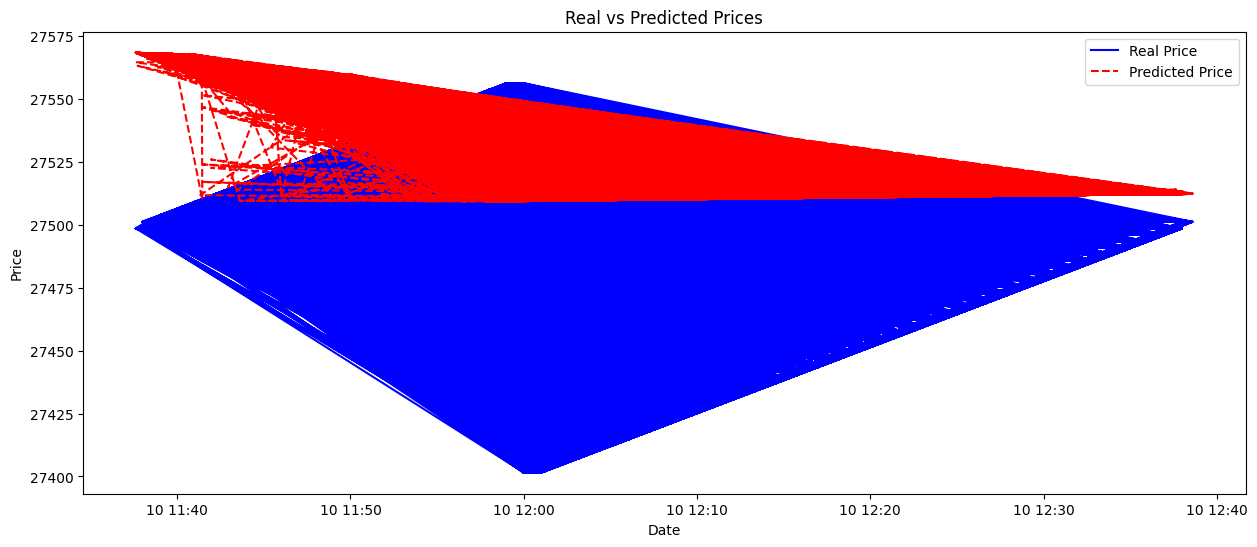

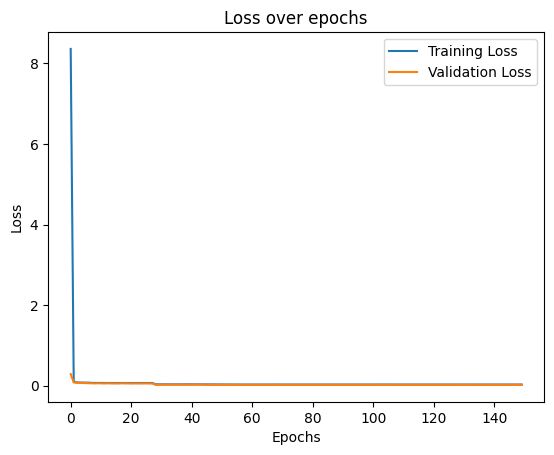

Index                       128
TRADE_ID                 191964
PRICE                    191964
QUANTITY                 191964
BUYER_ORDER_ID           191964
SELLER_ORDER_ID          191964
IS_BUYER_MARKET_MAKER    191964
TRADE_YEAR               191964
TRADE_MONTH              191964
TRADE_DAY                191964
TRADE_HOUR               191964
TRADE_MINUTE             191964
TRADE_SECOND             191964
Date                     383928
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRADE_ID               47991 non-null  int32         
 1   PRICE                  47991 non-null  float32       
 2   QUANTITY               47991 non-null  float32       
 3   BUYER_ORDER_ID         47991 non-null  int32         
 4   SELLER_ORDER_ID        47991 non-null  int32         
 5   IS_BUYER_MAR

In [ ]:
# model exsemple 7/1 LSTM -WEIGHTS 7
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import LSTM, Dense, Dropout, Input, Bidirectional, LeakyReLU
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import initializers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

start_time = time.time()
# Assume you have already loaded and processed your data
# scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test, dates_test
# and also loaded the scaler 'loaded_scaler' for inverse transformation

# LSTM Model Construction with improvements
look_back = scaled_X_train.shape[1]
weight_decay = 0.006

input_layer = Input(shape=(scaled_X_train.shape[1], scaled_X_train.shape[2]))  # Adjusted input shape
x = Bidirectional(LSTM(75, return_sequences=True, kernel_regularizer=l1_l2(l1=weight_decay, l2=weight_decay), kernel_initializer=initializers.he_normal(seed=0)))(input_layer)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(40, return_sequences=False, kernel_regularizer=l1_l2(l1=weight_decay, l2=weight_decay), kernel_initializer=initializers.he_normal(seed=0)))(x)
x = Dropout(0.3)(x)
x = Dense(25)(x)
x = LeakyReLU()(x)
output_layer = Dense(2, activation='linear')(x)  # Change from 1 to 2 for both "PRICE" and "QUANTITY"


model = Model(inputs=input_layer, outputs=output_layer)

# Use custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)

# Training the model
history = model.fit(scaled_X_train, scaled_y_train, validation_data=(scaled_X_test, scaled_y_test), epochs=150, batch_size=40, callbacks=[early_stopping, reduce_lr])



# Splitting the last two columns of the last timestep of scaled_X_test to get y_test with both PRICE and QUANTITY
y_test_reshaped = scaled_X_test[:, -1, -2:]

# Predictions
y_pred = model.predict(scaled_X_test)
y_pred_original = loaded_scaler.inverse_transform(y_pred)  # Assuming y_pred has shape (9599,2)

# Directly use y_test_reshaped for inverse transform
y_test_original = loaded_scaler.inverse_transform(y_test_reshaped)

# Create a DataFrame for test set results
test_results_df = pd.DataFrame({
    'Date': dates_test,
    'Real Price': y_test_original[:, 0],  # Assuming first column is PRICE
    'Predicted Price': y_pred_original[:, 0],
    'Real Quantity': y_test_original[:, 1],  # Assuming second column is QUANTITY
    'Predicted Quantity': y_pred_original[:, 1]
})

print(test_results_df.head())


# Calculate metrics for PRICE
mae_price = mean_absolute_error(y_test_original[:, 0], y_pred_original[:, 0])
rmse_price = mean_squared_error(y_test_original[:, 0], y_pred_original[:, 0], squared=False)
mape_price = np.mean(np.abs((y_test_original[:, 0] - y_pred_original[:, 0]) / y_test_original[:, 0])) * 100

print(f"Mean Absolute Error (Price): {mae_price}")
print(f"Root Mean Squared Error (Price): {rmse_price}")
print(f"Mean Absolute Percentage Error (Price): {mape_price}%")


# Visualization of real vs predicted prices
plt.figure(figsize=(15, 6))
plt.plot(test_results_df['Date'], test_results_df['Real Price'], label='Real Price', color='blue')
plt.plot(test_results_df['Date'], test_results_df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Real vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualization of loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Assuming df is defined
print(df.memory_usage())
df.info()
print(df.describe())
print(df.columns)

end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save_weights('/content/drive/MyDrive/BINANCE/1H/my_weights.h5', save_format='h5')


In [ ]:
model.save('/content/drive/MyDrive/BINANCE/1H/my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(df.memory_usage())


In [ ]:
print(df.groupby('PRICE').mean())


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRADE_ID               47991 non-null  int64  
 1   PRICE                  47991 non-null  float64
 2   QUANTITY               47991 non-null  float64
 3   BUYER_ORDER_ID         47991 non-null  int64  
 4   SELLER_ORDER_ID        47991 non-null  int64  
 5   IS_BUYER_MARKET_MAKER  47991 non-null  int64  
 6   TRADE_HOUR             47991 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.6 MB


In [ ]:
print(df.describe())


           TRADE_ID         PRICE      QUANTITY  BUYER_ORDER_ID  \
count  4.799100e+04  47991.000000  47991.000000    4.799100e+04   
mean   3.234620e+09      0.442916      0.003938    2.268038e+10   
std    1.385395e+04      0.238370      0.017727    8.088109e+05   
min    3.234596e+09      0.000000      0.000000    2.267157e+10   
25%    3.234608e+09      0.287046      0.000053    2.268037e+10   
50%    3.234620e+09      0.378183      0.000127    2.268051e+10   
75%    3.234632e+09      0.535492      0.000936    2.268064e+10   
max    3.234644e+09      1.000000      1.000000    2.268078e+10   

       SELLER_ORDER_ID  IS_BUYER_MARKET_MAKER    TRADE_HOUR  
count     4.799100e+04           47991.000000  47991.000000  
mean      2.268051e+10               0.518993     11.603321  
std       2.056203e+05               0.499644      0.489213  
min       2.267266e+10               0.000000     11.000000  
25%       2.268038e+10               0.000000     11.000000  
50%       2.268051e+10  

In [ ]:
print(df.head())
print(df.tail())


     TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
0  3234595905  0.857830  0.000058     22680259990      22680258817   
1  3234595906  0.857931  0.000040     22680259990      22680258889   
2  3234595907  0.858432  0.000080     22680259990      22680259285   
3  3234595908  0.858532  0.000058     22680259990      22680258833   
4  3234595909  0.858733  0.000053     22680259990      22680258857   

   IS_BUYER_MARKET_MAKER  TRADE_HOUR  
0                      0          11  
1                      0          11  
2                      0          11  
3                      0          11  
4                      0          11  
         TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
47986  3234643764  0.074494  0.001283     22680777141      22680777760   
47987  3234643765  0.074594  0.000260     22680777779      22680777210   
47988  3234643766  0.074594  0.000308     22680777781      22680777210   
47989  3234643767  0.074594  0.000283     2268077

In [ ]:
print(df.corr())


                       TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  \
TRADE_ID               1.000000 -0.689619 -0.004201        0.228375   
PRICE                 -0.689619  1.000000 -0.030585        0.005972   
QUANTITY              -0.004201 -0.030585  1.000000        0.017888   
BUYER_ORDER_ID         0.228375  0.005972  0.017888        1.000000   
SELLER_ORDER_ID        0.733351 -0.463095 -0.000609        0.248357   
IS_BUYER_MARKET_MAKER -0.001064 -0.013328  0.002961       -0.154300   
TRADE_HOUR             0.847333 -0.690303 -0.001585        0.200144   

                       SELLER_ORDER_ID  IS_BUYER_MARKET_MAKER  TRADE_HOUR  
TRADE_ID                      0.733351              -0.001064    0.847333  
PRICE                        -0.463095              -0.013328   -0.690303  
QUANTITY                     -0.000609               0.002961   -0.001585  
BUYER_ORDER_ID                0.248357              -0.154300    0.200144  
SELLER_ORDER_ID               1.000000             

<Axes: xlabel='TRADE_HOUR', ylabel='QUANTITY'>

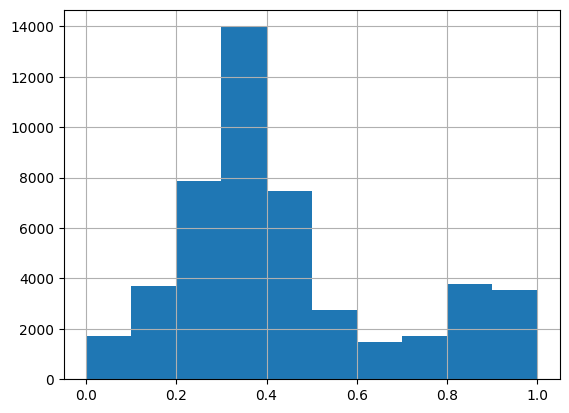

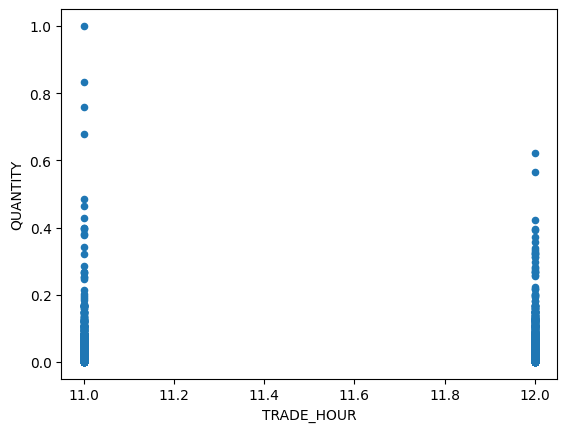

In [ ]:
df['PRICE'].hist()
df.plot(x='TRADE_HOUR', y='QUANTITY', kind='scatter')


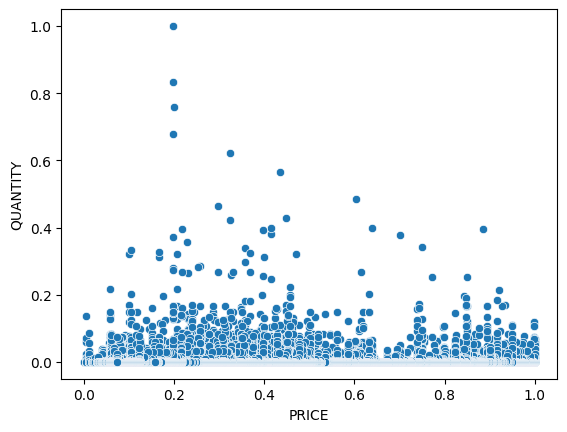

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='PRICE', y='QUANTITY')
plt.show()



In [ ]:
print(df.columns)


Index(['TRADE_ID', 'PRICE', 'QUANTITY', 'BUYER_ORDER_ID', 'SELLER_ORDER_ID',
       'IS_BUYER_MARKET_MAKER', 'TRADE_HOUR'],
      dtype='object')


In [ ]:
!pip install seaborn


In [ ]:
import seaborn as sns


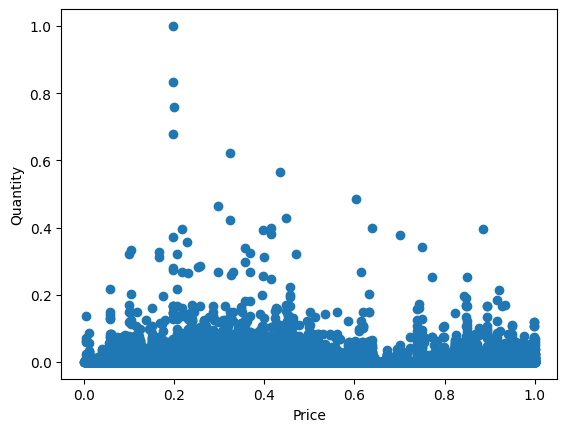

In [ ]:
plt.scatter(df['PRICE'], df['QUANTITY'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


         TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
0      3234595905  0.857830  0.000058     22680259990      22680258817   
1      3234595906  0.857931  0.000040     22680259990      22680258889   
2      3234595907  0.858432  0.000080     22680259990      22680259285   
3      3234595908  0.858532  0.000058     22680259990      22680258833   
4      3234595909  0.858733  0.000053     22680259990      22680258857   
...           ...       ...       ...             ...              ...   
47986  3234643764  0.074494  0.001283     22680777141      22680777760   
47987  3234643765  0.074594  0.000260     22680777779      22680777210   
47988  3234643766  0.074594  0.000308     22680777781      22680777210   
47989  3234643767  0.074594  0.000283     22680777782      22680777210   
47990  3234643768  0.074594  0.000342     22680777793      22680777210   

       IS_BUYER_MARKET_MAKER  TRADE_YEAR  TRADE_MONTH  TRADE_DAY  TRADE_HOUR  \
0                          0   

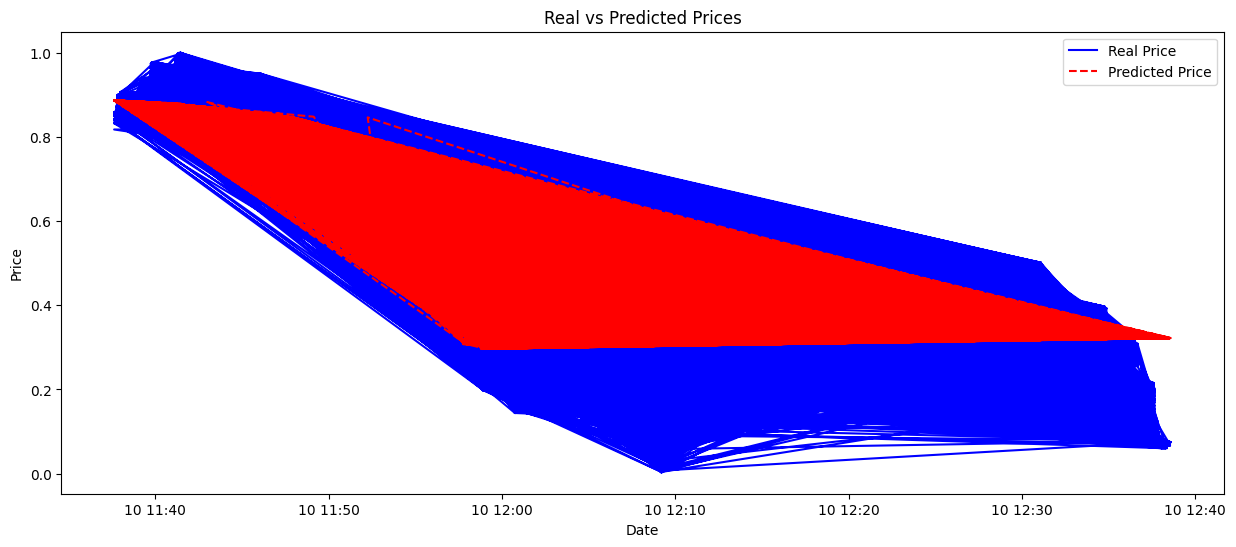

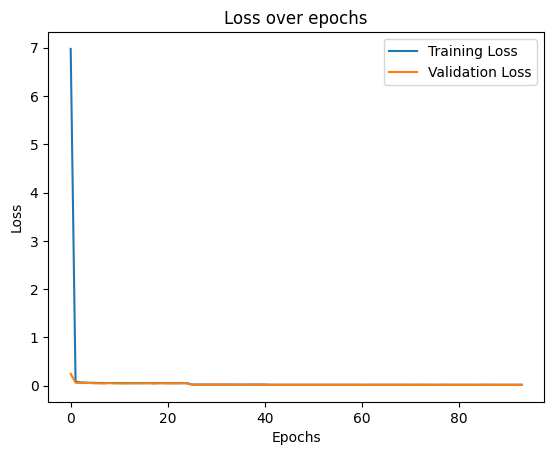

Index                       128
TRADE_ID                 383928
PRICE                    383928
QUANTITY                 383928
BUYER_ORDER_ID           383928
SELLER_ORDER_ID          383928
IS_BUYER_MARKET_MAKER    383928
TRADE_YEAR               383928
TRADE_MONTH              383928
TRADE_DAY                383928
TRADE_HOUR               383928
TRADE_MINUTE             383928
TRADE_SECOND             383928
Date                     383928
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47991 entries, 0 to 47990
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRADE_ID               47991 non-null  int64         
 1   PRICE                  47991 non-null  float64       
 2   QUANTITY               47991 non-null  float64       
 3   BUYER_ORDER_ID         47991 non-null  int64         
 4   SELLER_ORDER_ID        47991 non-null  int64         
 5   IS_BUYER_MAR

In [ ]:
# model exsemple 4

import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Dropout, Input, Bidirectional, LeakyReLU
from keras.regularizers import l2, l1, l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import initializers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime as dt


start_time = time.time()

# Load and preprocess data
def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        df.drop(['TRADE_TIME'], axis=1, inplace=True)
        return df
    except Exception as e:
        print(f"Error reading the file {file_path}. Exception: {e}")
        return None

# Load data
file_path = '/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv'
df = load_and_preprocess_data(file_path)
print(df)


# Create a 'Date' column using the trade columns
# Convert the trade columns to a single datetime column
df['Date'] = pd.to_datetime(df['TRADE_YEAR'].astype(str) + '-' +
                            df['TRADE_MONTH'].astype(str) + '-' +
                            df['TRADE_DAY'].astype(str) + ' ' +
                            df['TRADE_HOUR'].astype(str) + ':' +
                            df['TRADE_MINUTE'].astype(str) + ':' +
                            df['TRADE_SECOND'].astype(str))


# Split data
X = df.drop(['PRICE', 'Date'], axis=1)  # Exclude the 'Date' column from features
y = df['PRICE']
dates = df['Date']  # Extract dates

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, random_state=42)

# Normalize the features using RobustScaler to handle outliers
scaler_X = RobustScaler()
scaled_X_train = scaler_X.fit_transform(X_train)
scaled_X_test = scaler_X.transform(X_test)

# Reshape the scaled data for LSTM
scaled_X_train = scaled_X_train.reshape(scaled_X_train.shape[0], 1, scaled_X_train.shape[1])
scaled_X_test = scaled_X_test.reshape(scaled_X_test.shape[0], 1, scaled_X_test.shape[1])

# Normalize the target
scaler_y = MinMaxScaler()
scaled_y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
scaled_y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

# LSTM Model Construction with improvements
look_back = X_train.shape[1]
weight_decay = 0.005

input_layer = Input(shape=(1, look_back))
x = Bidirectional(LSTM(75, return_sequences=True, kernel_regularizer=l1_l2(l1=weight_decay, l2=weight_decay), kernel_initializer=initializers.he_normal(seed=0)))(input_layer)
x = Dropout(0.3)(x)
x = Bidirectional(LSTM(40, return_sequences=False, kernel_regularizer=l1_l2(l1=weight_decay, l2=weight_decay), kernel_initializer=initializers.he_normal(seed=0)))(x)
x = Dropout(0.3)(x)
x = Dense(25)(x)
x = LeakyReLU()(x)
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Use custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)

# Training the model
history = model.fit(scaled_X_train, scaled_y_train, validation_data=(scaled_X_test, scaled_y_test), epochs=150, batch_size=40, callbacks=[early_stopping, reduce_lr])

# Predictions
y_pred = model.predict(scaled_X_test)
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = y_test.values

# Calculate metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}%")

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': dates_test,
    'Real Price': y_test_original.flatten(),
    'Predicted Price': y_pred_original.flatten()
})
print(comparison_df)

# Visualization of real vs predicted prices
plt.figure(figsize=(15, 6))
plt.plot(comparison_df['Date'], comparison_df['Real Price'], label='Real Price', color='blue')
plt.plot(comparison_df['Date'], comparison_df['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Real vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Visualization
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
print(df.memory_usage())
df.info()
print(df.describe())
print(df.columns)

end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, Dropout, Input
from keras.regularizers import l2
from keras.callbacks import TensorBoard
from keras import initializers
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import logging
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Normalize y_test
scaled_y_test = scaler_y.transform(y_test.astype('float64').values.reshape(-1, 1))

start_time = time.time()

# LSTM Model Construction
look_back = X_train.shape[1]
weight_decay = 0.01
input_layer = Input(shape=(1, look_back))

x = LSTM(128, return_sequences=True, kernel_regularizer=l2(weight_decay), kernel_initializer=initializers.he_normal(seed=0))(input_layer)
x = Dropout(0.5)(x)
x = LSTM(32, return_sequences=False, kernel_regularizer=l2(weight_decay), kernel_initializer=initializers.he_normal(seed=0))(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
output_layer = Dense(1, activation='linear')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")

# Training the model
start_time = time.time()

history = model.fit(scaled_X_train, scaled_y_train, validation_data=(scaled_X_test, scaled_y_test), callbacks=[tensorboard_callback], epochs=100, batch_size=64)

end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")

# Predicting using last 5 data points
last_data_points = X.iloc[-5:].values
for data_point in last_data_points:
    data_point_normalized_2d = scaler_X.transform([data_point])
    data_point_normalized = data_point_normalized_2d.reshape(1, 1, 6)

    predicted_price_normalized = model.predict(data_point_normalized)
    predicted_price = scaler_y.inverse_transform(predicted_price_normalized)
    print(f"Predicted price: {predicted_price[0][0]}")

# Errors in predictions
y_pred = model.predict(scaled_X_test)
errors = y_test.values - y_pred.squeeze()
sorted_error_indices = np.argsort(np.abs(errors))

print("Top 5 correct predictions:")
for i in range(5):
    idx = sorted_error_indices[i]
    print(f"Actual: {y_test.iloc[idx]}, Predicted: {y_pred[idx][0]}, Error: {errors[idx]}")


# Predict on test set
y_pred = model.predict(scaled_X_test)

# Inverse transform the predictions to original scale
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = y_test.values

# Calculate metrics
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = mean_squared_error(y_test_original, y_pred_original, squared=False)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}%")

# Visualization
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# This is in a subsequent cell
print(df.head())
# Access the DataFrame 'df' and perform operations on it
print(df.describe())  # Prints statistical summary of the DataFrame


start_time = time.time()

#2Constructing LSTM network
input_layer = Input(shape=(look_back, 5))
x = LSTM(128,return_sequences=True,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(input_layer)
x = Dropout(0.5)(x)
x = LSTM(32,return_sequences = False,kernel_regularizer=l2(weight_decay),kernel_initializer=initializers.he_normal(seed=0))(x)
x = Dropout(0.5)(x)
x = Dense(16,activation='relu')(x)
output_layer = Dense(1,activation='linear')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(dataset, epochs=5)



print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
logger.info(f"Computing technical indicators took {end_time - start_time} seconds")


end_time = time.time()
time_difference = end_time - start_time
minutes = time_difference // 60
seconds = time_difference % 60
print(f"Time taken: {int(minutes)} minutes and {seconds:.6f} seconds.")
print(time.time())
print(time.time())

In [ ]:
# 5
#Now I wanted to show the loss and validation loss dynamics
plt.figure()
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:

# Access the DataFrame 'df' and perform operations on it
print(df.describe())  # Prints statistical summary of the DataFrame


from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/BINANCE/1H/my_dataframe.csv"  # Change 'my_dataframe.csv' to your preferred file name
df.to_csv(path, index=False)  # 'index=False' ensures that the row indices are not saved to the CSV



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Creating the comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


In [ ]:


# Save the comparison_df to Google Drive
comparison_df_path = "/content/drive/MyDrive/BINANCE/1H/comparison_results.csv"
comparison_df.to_csv(comparison_df_path, index=False)
print(f"Results saved to: {comparison_df_path}")


Results saved to: /content/drive/MyDrive/BINANCE/1H/comparison_results.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Prediction and Metrics
y_pred = grid_search.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Create DataFrame from results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df['MAE'] = mae
results_df['RMSE'] = rmse

# Save the results DataFrame to Google Drive
results_path = "/content/drive/MyDrive/BINANCE/1H/prediction_results.csv"
results_df.to_csv(results_path, index=False)
print(f"Results saved to: {results_path}")


Results saved to: /content/drive/MyDrive/BINANCE/1H/prediction_results.csv


In [ ]:
import os

import logging
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import LocalOutlierFactor

from google.colab import drive  # <-- Add this import

# Load data
df = load_and_preprocess_data('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')
print(df.head())  # Print the first few rows of the DataFrame

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("error.log"), logging.StreamHandler()])
logger = logging.getLogger(__name__)

def read_csv_from_drive(file_path):
    """Function to read CSV from Google Drive."""
    try:
        return cudf.read_csv(file_path)
    except Exception as e:
        logger.error(f"Error reading the file {file_path}. Exception: {e}")
        return None

def get_signals(df):
    """Function to detect anomalies, compute technical indicators, and add them to the dataframe."""
    if 'PRICE' not in df.columns or 'QUANTITY' not in df.columns:
        logger.error("PRICE or QUANTITY column is missing in the dataframe.")
        return

    feature_cols = ['PRICE', 'QUANTITY']

    # Normalize the data
    try:
        start_time = time.time()
        scaler = cuml.preprocessing.StandardScaler()
        df[feature_cols] = scaler.fit_transform(df[feature_cols])
        end_time = time.time()
        logger.info(f"Normalizing data took {end_time - start_time} seconds")
    except Exception as e:
        logger.error(f"Error normalizing data. Exception: {e}")
        return

    # Anomaly Detection using DBSCAN
    try:
        start_time = time.time()
        # Anomaly Detection using DBSCAN
        dbscan = cuml.DBSCAN(eps=0.5, min_samples=5)
        df['DBSCAN_Anomaly'] = dbscan.fit_predict(df[feature_cols])

        anomalies_dbscan = df[df['DBSCAN_Anomaly'] == -1]
        end_time = time.time()
        logger.info(f"DBSCAN took {end_time - start_time} seconds")
        print(f'Anomalies detected using DBSCAN: {len(anomalies_dbscan)}')
        print(anomalies_dbscan.head())
    except Exception as e:
        logger.error(f"Error detecting anomalies using DBSCAN. Exception: {e}")

# Anomaly Detection using DBSCAN
    try:
        start_time = time.time()
        # Anomaly Detection using DBSCAN
        dbscan = cuml.DBSCAN(eps=0.5, min_samples=5)
        df['DBSCAN_Anomaly'] = dbscan.fit_predict(df[feature_cols])

        anomalies_dbscan = df[df['DBSCAN_Anomaly'] == -1]
        end_time = time.time()
        logger.info(f"DBSCAN took {end_time - start_time} seconds")
        print(f'Anomalies detected using DBSCAN: {len(anomalies_dbscan)}')
        print(anomalies_dbscan.head())
    except Exception as e:
        logger.error(f"Error detecting anomalies using DBSCAN. Exception: {e}")

    # Technical Indicators using `ta` library
    try:
        start_time = time.time()
        window_size = 100
        df['SMA1'] = df['PRICE'].rolling(window=1).mean()
        df['SMA100'] = df['PRICE'].rolling(window=window_size).mean()
        # Custom GPU RSI Calculation (Simplified)
        delta = df['PRICE'].diff().fillna(0)
        gain = (delta.where(delta > 0, 0))
        loss = (-delta.where(delta < 0, 0))
        avg_gain = gain.rolling(window=window_size).mean()
        avg_loss = loss.rolling(window=window_size).mean()
        rs = avg_gain / avg_loss
        df['RSI'] = 100 - (100 / (1 + rs))
        # Other technical indicators can also be implemented in a similar GPU-accelerated manner
        end_time = time.time()
        logger.info(f"Computing technical indicators took {end_time - start_time} seconds")
    except Exception as e:
        logger.error(f"Error computing technical indicators. Exception: {e}")

     # Save to CSV
    try:
        path = "/content/drive/MyDrive/BINANCE/1H/Technical_indicators_simplified_1h.csv"
        df.to_csv(path)
        logger.info(f"Data saved successfully to {path}")
    except Exception as e:
        logger.error(f"Error saving data to {path}. Exception: {e}")

# Assuming Google Drive is already mounted
df = read_csv_from_drive('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')

# Check if the dataframe is not empty before proceeding
if df is not None and not df.empty:
    get_signals(df)
else:
    logger.error("DataFrame is empty or None.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    SYMBOL    TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
0  BTCUSDT  3234595905  0.857830  0.000058     22680259990      22680258817   
1  BTCUSDT  3234595906  0.857931  0.000040     22680259990      22680258889   
2  BTCUSDT  3234595907  0.858432  0.000080     22680259990      22680259285   
3  BTCUSDT  3234595908  0.858532  0.000058     22680259990      22680258833   
4  BTCUSDT  3234595909  0.858733  0.000053     22680259990      22680258857   

   IS_BUYER_MARKET_MAKER  TRADE_HOUR  
0                      0          11  
1                      0          11  
2                      0          11  
3                      0          11  
4                      0          11  
[W] [17:57:25.828843] Batch size limited by the chosen integer type (4 bytes). 47991 -> 44747. Using the larger integer type might result in better performance


ERROR:__main__:Error detecting anomalies using LOF. Exception: module cuml has no attribute LocalOutlierFactor


Anomalies detected using DBSCAN: 65
       SYMBOL    TRADE_ID     PRICE   QUANTITY  BUYER_ORDER_ID  \
78    BTCUSDT  3234595848  1.679659  10.884503     22680259779   
1176  BTCUSDT  3234596954  1.985024   6.597394     22680270915   
1191  BTCUSDT  3234596969  2.001848  11.900645     22680270923   
2667  BTCUSDT  3234598445  2.326141   6.469812     22680285809   
2739  BTCUSDT  3234598517  2.326141   6.463795     22680285809   

      SELLER_ORDER_ID  IS_BUYER_MARKET_MAKER  TRADE_HOUR  DBSCAN_Anomaly  
78        22680259707                      0          11              -1  
1176      22680270864                      0          11              -1  
1191      22680264396                      0          11              -1  
2667      22680285616                      0          11              -1  
2739      22680286560                      1          11              -1  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    SYMBOL    TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
0  BTCUSDT  3234595905  0.857830  0.000058     22680259990      22680258817   
1  BTCUSDT  3234595906  0.857931  0.000040     22680259990      22680258889   
2  BTCUSDT  3234595907  0.858432  0.000080     22680259990      22680259285   
3  BTCUSDT  3234595908  0.858532  0.000058     22680259990      22680258833   
4  BTCUSDT  3234595909  0.858733  0.000053     22680259990      22680258857   

   IS_BUYER_MARKET_MAKER  TRADE_HOUR  
0                      0          11  
1                      0          11  
2                      0          11  
3                      0          11  
4                      0          11  


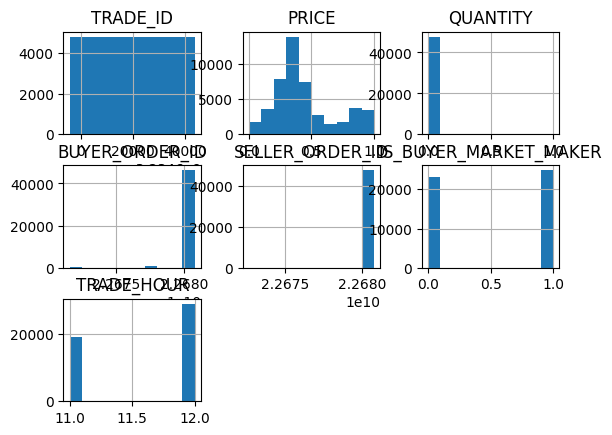

Anomalies detected using DBSCAN: 65
       SYMBOL    TRADE_ID     PRICE  QUANTITY  BUYER_ORDER_ID  \
78    BTCUSDT  3234595848  0.843293  0.196890     22680259779   
1176  BTCUSDT  3234596954  0.916082  0.120892     22680270915   
1191  BTCUSDT  3234596969  0.920092  0.214904     22680270923   
2667  BTCUSDT  3234598445  0.997393  0.118630     22680285809   
2739  BTCUSDT  3234598517  0.997393  0.118524     22680285809   

      SELLER_ORDER_ID  IS_BUYER_MARKET_MAKER  TRADE_HOUR  DBSCAN_Anomaly  
78        22680259707                      0          11              -1  
1176      22680270864                      0          11              -1  
1191      22680264396                      0          11              -1  
2667      22680285616                      0          11              -1  
2739      22680286560                      1          11              -1  
Anomalies detected using LOF: 477
       SYMBOL    TRADE_ID    PRICE  QUANTITY  BUYER_ORDER_ID  SELLER_ORDER_ID  \
3254  BT

In [ ]:
import os
import pandas as pd
import logging
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import ta
import pdb

from google.colab import drive
drive.mount('/content/drive')

def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None
df = load_and_preprocess_data('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')

def test_load_and_preprocess_data():
    file_path = '/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv'
    df = load_and_preprocess_data(file_path)
    assert df is not None, f"Failed to load data from {file_path}"
    # Add more assertions as needed, e.g., on the shape or contents of df

test_load_and_preprocess_data()

df = load_and_preprocess_data('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')
print(df.head())  # Print the first few rows of the DataFrame

import matplotlib.pyplot as plt

df = load_and_preprocess_data('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')
df.hist()
plt.show()

def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        pdb.set_trace()  # Insert a breakpoint
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None

# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[
                        logging.FileHandler("error.log"),
                        logging.StreamHandler()
                    ])
logger = logging.getLogger(__name__)

def read_csv_from_drive(file_path):
    """Function to read CSV from Google Drive."""
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        logger.error(f"Error reading the file {file_path}. Exception: {e}")
        return None

def get_signals(df):
    """Function to detect anomalies, compute technical indicators, and add them to the dataframe."""
    if 'PRICE' not in df.columns or 'QUANTITY' not in df.columns:
        logger.error("PRICE or QUANTITY column is missing in the dataframe.")
        return

    feature_cols = ['PRICE', 'QUANTITY']

    # Normalize the data
    try:
        scaler = StandardScaler()
        data_normalized = scaler.fit_transform(df[feature_cols])
    except Exception as e:
        logger.error(f"Error normalizing data. Exception: {e}")
        return

    # Anomaly Detection using DBSCAN
    try:
        dbscan = DBSCAN(eps=0.5, min_samples=5).fit(data_normalized)
        df['DBSCAN_Anomaly'] = dbscan.labels_
        anomalies_dbscan = df[df['DBSCAN_Anomaly'] == -1]
        print(f'Anomalies detected using DBSCAN: {len(anomalies_dbscan)}')
        print(anomalies_dbscan.head())
    except Exception as e:
        logger.error(f"Error detecting anomalies using DBSCAN. Exception: {e}")

    # Anomaly Detection using LOF
    try:
        lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
        df['LOF_Anomaly'] = lof.fit_predict(data_normalized)
        anomalies_lof = df[df['LOF_Anomaly'] == -1]
        print(f'Anomalies detected using LOF: {len(anomalies_lof)}')
        print(anomalies_lof.head())
    except Exception as e:
        logger.error(f"Error detecting anomalies using LOF. Exception: {e}")

    # Technical Indicators using `ta` library
    try:
        df['SMA1'] = df['PRICE'].rolling(window=1).mean()
        df['SMA100'] = df['PRICE'].rolling(window=100).mean()
        df['RSI'] = ta.momentum.RSIIndicator(df['PRICE']).rsi()
        macd = ta.trend.MACD(df['PRICE'])
        df['MACD'] = macd.macd()
        df['MACD_Signal'] = macd.macd_signal()

        print(df[['RSI', 'MACD', 'MACD_Signal']].head())
    except Exception as e:
        logger.error(f"Error computing technical indicators. Exception: {e}")

    # Save to CSV
    try:
        path = "/content/drive/MyDrive/BINANCE/1H/Technical_indicators_simplified_1h.csv"
        df.to_csv(path)
        logger.info(f"Data saved successfully to {path}")
    except Exception as e:
        logger.error(f"Error saving data to {path}. Exception: {e}")

# Assuming Google Drive is already mounted
df = read_csv_from_drive('/content/drive/MyDrive/BINANCE/1H/1h_processed_data.csv')

# Check if the dataframe is not empty before proceeding
if df is not None and not df.empty:
    get_signals(df)
else:
    logger.error("DataFrame is empty or None.")


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
